##  Analyzing the channel stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['axes.grid'] = False

In [3]:
data = pd.read_csv('D:/A DSDA/Semester 3/Social Media Analytics/tripoto_channel_stats1.csv', encoding='iso-8859-1')
data.head()

Unnamed: 0           id                                              title  \
0           1  -4kHt9nHV5E  Singapore | Adrenaline Trail | Naveen Kasturia...   
1           2  -KhPGgYK__E  A Magical Journey Across Germany | Ft. Cherry ...   
2           3  _1DOA2RdwUo  Revel In The Lap Of Luxury At Beyond By Sula |...   
3           4  _aVaR-yQbd8  #SwipeRightToTravel | Ep 3 | Escaping The City...   
4           5  _eTSHOtIp5g  A Luxurious Getaway In The Heart Of Madhya Pra...   

       publication_date                                        description  \
0  2019-04-04T12:39:39Z  In episode 4 of #Trails2Passion, Naveen and Ve...   
1  2020-02-06T12:30:00Z  Come winter, Germany transforms into a truly m...   
2  2019-11-04T07:28:10Z  Beyond By Sula welcomes you to Nashik with its...   
3  2018-09-10T12:33:19Z  Do you also believe that travel is more about ...   
4  2020-01-21T09:41:33Z  Looking for a getaway in the heart of Madhya P...   

                 channel_id channel_title  viewCount  likeCount  dislikeCount  \
0  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto      20388      141.0           0.0   
1  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       3891      173.0           2.0   
2  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       4124      121.0           3.0   
3  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto     158988        9.0           0.0   
4  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       1843       48.0           0.0   

   favoriteCount  commentCount                                          url  
0              0           3.0  https://www.youtube.com/watch?v=-4kHt9nHV5E  
1              0          21.0  https://www.youtube.com/watch?v=-KhPGgYK__E  
2              0           5.0  https://www.youtube.com/watch?v=_1DOA2RdwUo  
3              0           1.0  https://www.youtube.com/watch?v=_aVaR-yQbd8  
4              0           4.0  https://www.youtube.com/watch?v=_eTSHOtIp5g

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        240 non-null    int64  
 1   id                240 non-null    object 
 2   title             240 non-null    object 
 3   publication_date  240 non-null    object 
 4   description       239 non-null    object 
 5   channel_id        240 non-null    object 
 6   channel_title     240 non-null    object 
 7   viewCount         240 non-null    int64  
 8   likeCount         239 non-null    float64
 9   dislikeCount      239 non-null    float64
 10  favoriteCount     240 non-null    int64  
 11  commentCount      238 non-null    float64
 12  url               240 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 24.5+ KB


In [33]:
# Converting it to datetime 
data['publication_date'] = data['publication_date'].astype('datetime64[ns]')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        240 non-null    int64         
 1   id                240 non-null    object        
 2   title             240 non-null    object        
 3   publication_date  240 non-null    datetime64[ns]
 4   description       239 non-null    object        
 5   channel_id        240 non-null    object        
 6   channel_title     240 non-null    object        
 7   viewCount         240 non-null    int64         
 8   likeCount         239 non-null    float64       
 9   dislikeCount      239 non-null    float64       
 10  favoriteCount     240 non-null    int64         
 11  commentCount      238 non-null    float64       
 12  url               240 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 24.5+ KB


In [35]:
print(data.publication_date)

0     2019-04-04 12:39:39
1     2020-02-06 12:30:00
2     2019-11-04 07:28:10
3     2018-09-10 12:33:19
4     2020-01-21 09:41:33
              ...        
235   2020-05-19 06:30:03
236   2019-11-11 12:30:09
237   2019-04-05 13:02:44
238   2020-02-20 12:30:08
239   2019-05-30 06:30:00
Name: publication_date, Length: 240, dtype: datetime64[ns]


In [36]:
data.isnull().sum()

Unnamed: 0          0
id                  0
title               0
publication_date    0
description         1
channel_id          0
channel_title       0
viewCount           0
likeCount           1
dislikeCount        1
favoriteCount       0
commentCount        2
url                 0
dtype: int64

In [38]:
data = data.drop('description', axis=1)
data.columns

Index(['Unnamed: 0', 'id', 'title', 'publication_date', 'channel_id',
       'channel_title', 'viewCount', 'likeCount', 'dislikeCount',
       'favoriteCount', 'commentCount', 'url'],
      dtype='object')

In [39]:
# imputing the missing values with the most frequent element in that attribute

data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data.isnull().sum()

Unnamed: 0          0
id                  0
title               0
publication_date    0
channel_id          0
channel_title       0
viewCount           0
likeCount           0
dislikeCount        0
favoriteCount       0
commentCount        0
url                 0
dtype: int64

In [42]:
df_non_indexed = data.copy()
data = data.set_index('publication_date')

In [44]:
# checking the Indexes
data.loc['2019-04-04': '2020-03-03']

Unnamed: 0           id  \
publication_date                               
2019-04-04 12:39:39           1  -4kHt9nHV5E   
2020-02-06 12:30:00           2  -KhPGgYK__E   
2019-11-04 07:28:10           3  _1DOA2RdwUo   
2020-01-21 09:41:33           5  _eTSHOtIp5g   
2019-11-19 12:30:01          13  1d1o4btIhRw   
2019-10-11 12:30:14          19  2BAQs8qhsTk   
2019-10-25 13:00:00          20  2dZgZUz0hIY   
2019-10-26 13:00:00          21  34Cukv2JA6g   
2019-09-02 08:27:39          24  3MJKYMDRQTw   
2019-11-17 11:28:38          28  4j-0re476uU   
2019-12-28 12:30:01          29  4tt73hUQlmk   
2019-11-08 12:30:09          36  5WqP7n2pPH0   
2019-12-17 12:30:00          37  621jdKjYgD8   
2019-07-07 05:30:00          42  7Gfi9WGGWwU   
2019-12-16 12:30:00          43  7t8ghxuLqpY   
2019-11-29 12:30:01          44  87_elSouedg   
2020-02-28 12:30:01          46  8ylepABmeZk   
2019-05-14 06:30:02          53  a7W0SQUGomg   
2019-10-02 12:30:00          59  AmXgKW3BF5w   
2019-05-27 06:30:00          60  Ao3jF1bejR4   
2019-10-27 14:30:00          61  ATx_f7aSV4g   
2019-11-13 12:30:11          63  avdMtn2vJrY   
2019-12-21 12:30:04          68  bpFT-ehWAZY   
2019-09-06 08:15:49          70  c_5-Yr1LTSg   
2019-08-26 08:55:27          71  c3AJrRaLd3c   
2020-01-26 12:30:15          72  cbdGG9mjLbE   
2020-02-11 12:30:02          73  ch-qA5gqyHE   
2020-02-18 07:00:10          74  ckDFxY09A2w   
2020-01-31 12:30:13          78  Cy7yKuVC2rM   
2020-02-09 12:30:02          79  d-v_CKwbRcM   
2020-01-12 12:30:13          80  dDOuAMvtekQ   
2019-04-17 06:30:02          83  dsLgXBFqFO0   
2019-04-08 09:17:03          85  e0xzQe6ITJY   
2020-01-27 12:30:11          87  EAoFulu3x9o   
2019-07-20 06:30:02          89  EIcHI7jKLsE   
2019-12-20 11:00:16          91  erAaS0jfw7I   
2020-02-13 11:40:27          93  evqSucIDifo   
2019-04-08 13:30:00          96  FFd1OewpIcc   
2020-01-29 12:30:18          99  FnFnI31GHIQ   
2019-06-01 05:30:01         100  FvRTP5lwG-c   
2019-11-22 12:30:00         103  GlxAkUoVWhM   
2019-09-13 08:26:35         107  GZx8YpY2ugE   
2019-10-09 12:30:20         110  hehwauuyPX4   
2019-04-09 13:30:04         114  hYvW1K07c4s   
2019-05-29 06:28:26         115  HZYGweEOv4Y   
2019-07-06 05:30:00         117  i6X0p0ZhN2k   
2019-05-31 05:31:53         119  i8NNsWln2Zo   
2019-08-23 08:05:34         121  iaffRzIBvE8   
2019-11-05 09:30:05         122  iCZj1-aeA5E   
2019-10-05 12:30:04         124  iua-kmtVRC8   
2019-11-04 12:30:14         125  jfgiQ3H7eF4   
2019-10-03 12:30:13         127  JgEAKqOMaEc   
2019-12-10 07:30:50         128  jhd6Sduu6fk   
2020-02-25 12:30:13         130  jjKA1LZ8I2c   
2019-12-02 13:30:00         132  JQr1-VchonU   
2019-05-28 06:30:01         133  JrgwzZ1-Fng   
2019-10-22 12:30:12         134  jU7ZyViNu2U   
2019-10-01 12:37:56         135  JVq_DZX7kYc   
2019-05-21 06:30:00         136  JwDdNckdCgE   
2020-01-17 13:04:26         139  KhWE6bKjQug   
2020-01-01 12:30:10         140  KlepP0mIKT0   
2019-05-08 12:30:00         144  LIF-xr9U9vg   
2019-04-07 12:33:50         152  mTO2TyFmtSs   
2019-07-04 05:30:00         155  nfCBFKZeJbU   
2019-12-26 12:30:02         156  ngV4_XRhhyo   
2020-03-03 12:30:02         159  O0UxUP92Bxw   
2020-02-02 12:30:14         161  odRL6xnIHXA   
2019-12-11 15:44:56         162  OThXzxIkwd4   
2019-11-09 12:30:12         163  oti-JFUgTd4   
2019-04-06 12:02:08         164  otj7-AZPAoI   
2019-10-07 12:30:13         165  oYH7LKK_lSo   
2019-08-19 07:47:38         172  QNQZ0URgTLg   
2020-01-11 13:00:11         182  sdfkYaHIusE   
2019-10-28 12:30:11         183  Sh5vdsQQ5EQ   
2019-05-30 06:46:57         185  ss-qh5Iz0hQ   
2019-05-11 12:30:01         186  SuJP4dCOdwU   
2020-01-07 11:30:02         189  TD0RAMkYMuI   
2019-06-02 05:30:00         192  twMaNz9uzPE   
2020-02-14 12:30:04         193  u03r1MBn3Ek   
2019-08-02 07:45:04         195  UDi1MsdqcA4   
2019-07-09 05:30:01         205  vGKBSXO5av4   
2019-04-08 09:51:57         207  VTcl

In [46]:
data['year'] = pd.DatetimeIndex(df_non_indexed['publication_date']).year
data['month'] = pd.DatetimeIndex(df_non_indexed['publication_date']).month

In [83]:
data['time'] = pd.DatetimeIndex(df_non_indexed['publication_date']).time

In [84]:
data.columns

Index(['Unnamed: 0', 'id', 'title', 'channel_id', 'channel_title', 'viewCount',
       'likeCount', 'dislikeCount', 'favoriteCount', 'commentCount', 'url',
       'year', 'month', 'time'],
      dtype='object')

Text(0, 0.5, 'Median value of View Count')

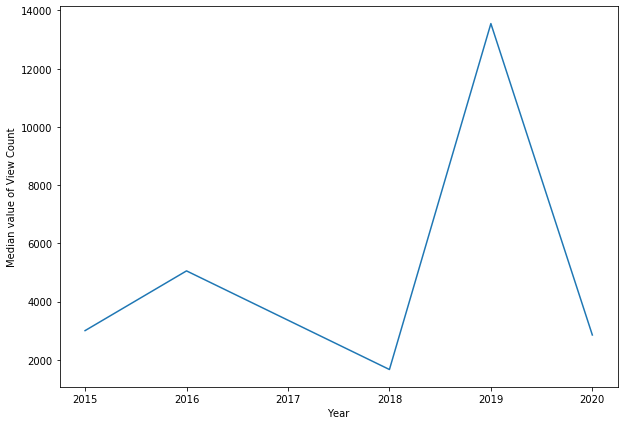

In [48]:
# Checking the relationship between PM2.5 values and Years

data.groupby('year')['viewCount'].median().plot()
plt.xlabel("Year")
plt.ylabel("Median value of View Count")

### Highest views in 2019

Text(0, 0.5, 'Median value of View Count')

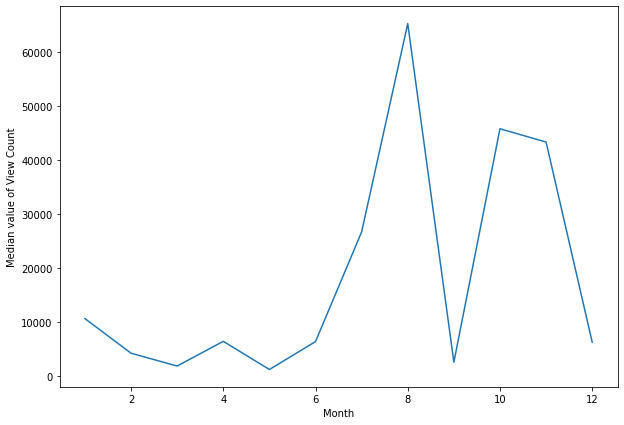

In [49]:
# Checking the relationship between PM2.5 values and Years

data.groupby('month')['viewCount'].median().plot()
plt.xlabel("Month")
plt.ylabel("Median value of View Count")

#### Highest views in Aug, Oct and Nov

Text(0, 0.5, 'Median value of Like Count')

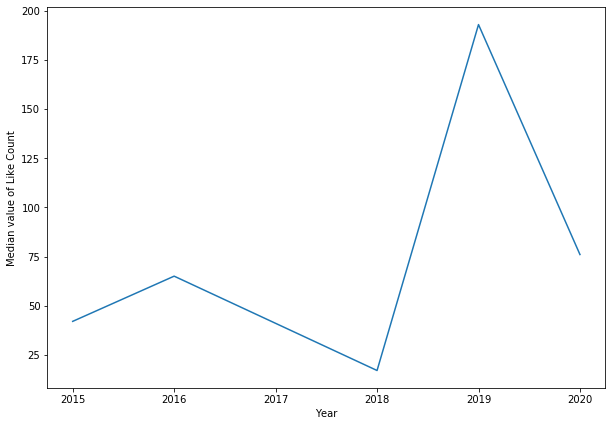

In [52]:
# Checking the relationship between PM2.5 values and Years

data.groupby('year')['likeCount'].median().plot()
plt.xlabel("Year")
plt.ylabel("Median value of Like Count")

Text(0, 0.5, 'Median value of Like Count')

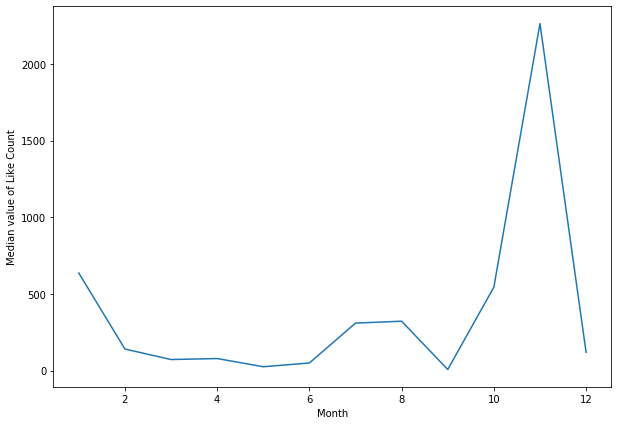

In [53]:

data.groupby('month')['likeCount'].median().plot()
plt.xlabel("Month")
plt.ylabel("Median value of Like Count")

Text(0, 0.5, 'Median value of Like Count')

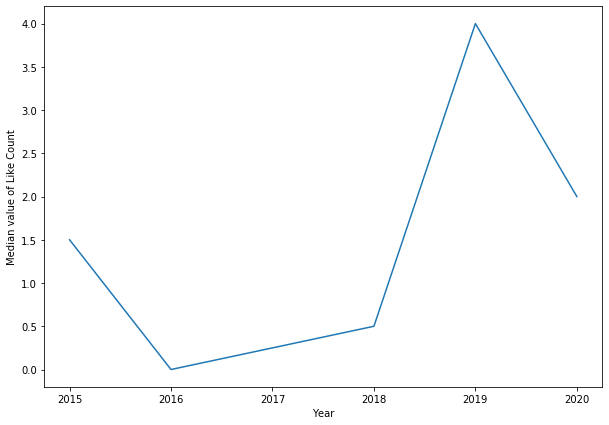

In [54]:
df =data.copy()
data.groupby('year')['dislikeCount'].median().plot()
plt.xlabel("Year")
plt.ylabel("Median value of Like Count")

Text(0, 0.5, 'Median value of Like Count')

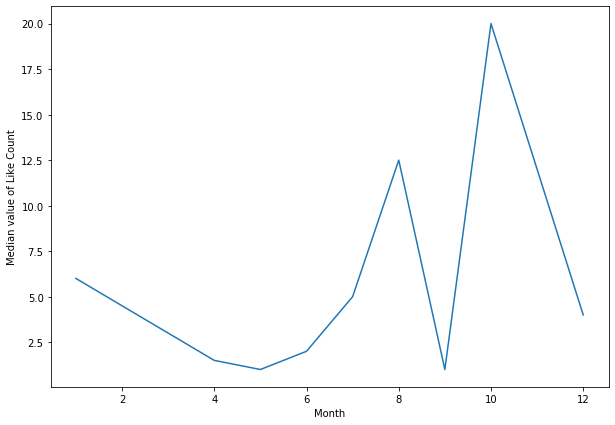

In [55]:
df =data.copy()
data.groupby('month')['dislikeCount'].median().plot()
plt.xlabel("Month")
plt.ylabel("Median value of Like Count")

Text(0, 0.5, 'Median value of View, Like and Dislike Count')

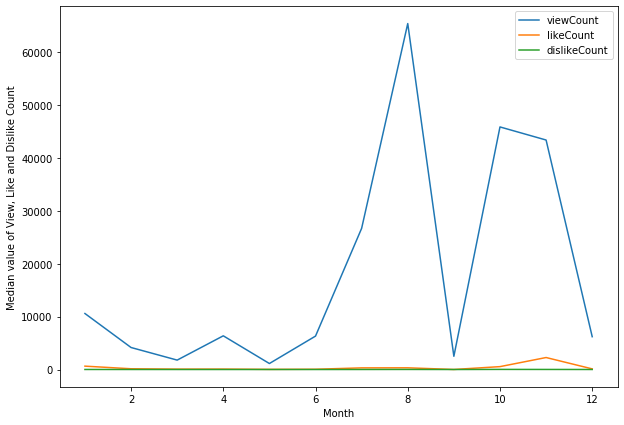

In [63]:
data =df.copy()
data.groupby('month')['viewCount',"likeCount", 'dislikeCount'].median().plot()
plt.xlabel("Month")
plt.ylabel("Median value of View, Like and Dislike Count")

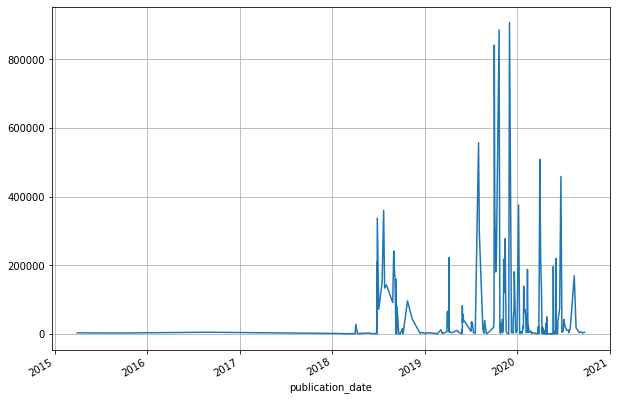

In [66]:
data['viewCount'].plot(grid=True)

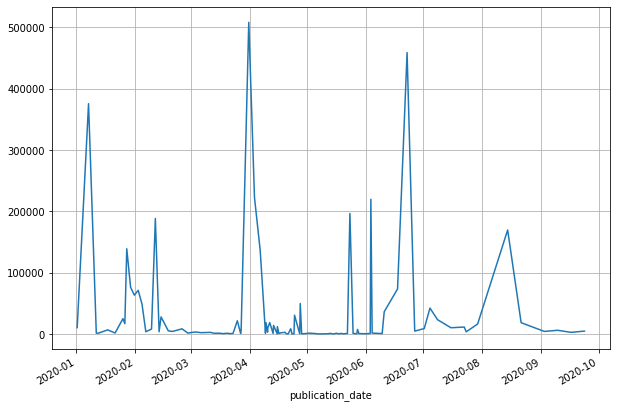

In [67]:
df_2020 = df.loc["2020"]
viewCount_data_2020 = df_2020['viewCount']
viewCount_data_2020.plot(grid=True)

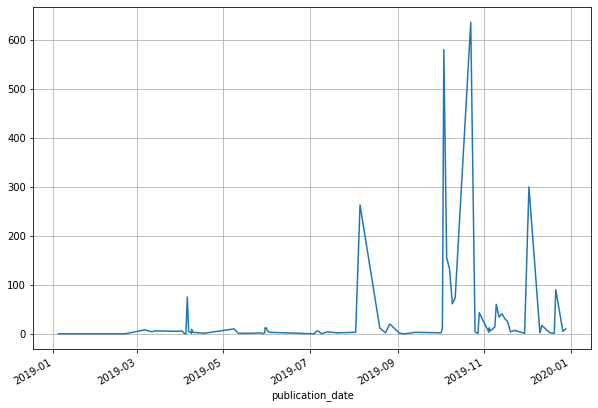

In [70]:
df_2019 = df.loc["2019"]
dislikeCount_data_2019 = df_2019['dislikeCount']
dislikeCount_data_2019.plot(grid=True)

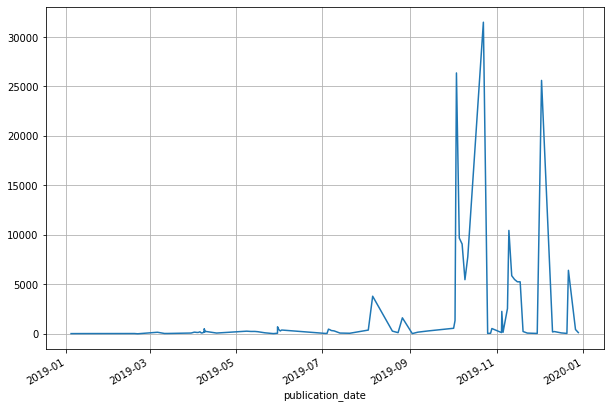

In [71]:
df_2019 = df.loc["2019"]
likeCount_data_2019 = df_2019['likeCount']
likeCount_data_2019.plot(grid=True)

Text(0, 0.5, 'Median value of View Count w.r.t. upload time')

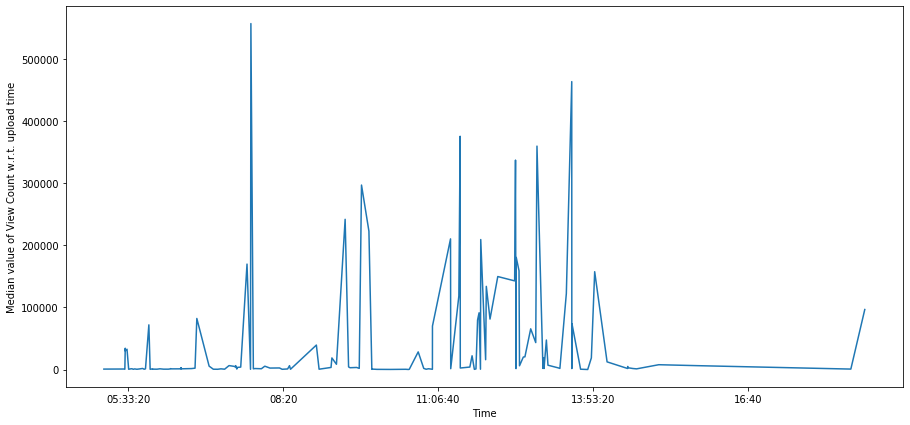

In [86]:
mpl.rcParams['figure.figsize'] = (15, 7)
mpl.rcParams['axes.grid'] = False

data.groupby('time')['viewCount'].median().plot()
plt.xlabel("Time")
plt.ylabel("Median value of View Count w.r.t. upload time")

In [82]:
data.columns

Index(['Unnamed: 0', 'id', 'title', 'channel_id', 'channel_title', 'viewCount',
       'likeCount', 'dislikeCount', 'favoriteCount', 'commentCount', 'url',
       'year', 'month'],
      dtype='object')

In [88]:
data['day'] = pd.DatetimeIndex(df_non_indexed['publication_date']).day

In [89]:
df_2014 = data['2018'].reset_index()
df_2015 = data['2019'].reset_index()
df_2014['month_day_hour'] = df_2014.apply(lambda x: str(x['month'])+"-"+x['day'], axis=1)
df_2015['month_day_hour'] = df_2015.apply(lambda x: str(x['month'])+"-"+x['day'], axis=1)
plt.plot(df_2014['month_day_hour'], df_2014['viewCount'])
plt.plot(df_2015['month_day_hour'], df_2015['viewCount'])
plt.legend(['2018', '2019'])
plt.xlabel("Month")
plt.ylabel("viewCount")
plt.title("viewCount plot for 2018 and 2019")

TypeError: can only concatenate str (not "int") to str

In [74]:
df_non_indexed['year'] = pd.DatetimeIndex(df_non_indexed['publication_date']).year
df_non_indexed['month'] = pd.DatetimeIndex(df_non_indexed['publication_date']).month

In [77]:
df_non_indexed['time'] = pd.DatetimeIndex(df_non_indexed['publication_date']).time

In [75]:
df_non_indexed.columns

Index(['Unnamed: 0', 'id', 'title', 'publication_date', 'channel_id',
       'channel_title', 'viewCount', 'likeCount', 'dislikeCount',
       'favoriteCount', 'commentCount', 'url', 'year', 'month'],
      dtype='object')

In [76]:
import plotly.express as px

fig = px.line(df_non_indexed, x = 'publication_date', y ='viewCount', title='viewCount with slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [73]:
df_non_indexed.columns

Index(['Unnamed: 0', 'id', 'title', 'publication_date', 'channel_id',
       'channel_title', 'viewCount', 'likeCount', 'dislikeCount',
       'favoriteCount', 'commentCount', 'url'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C5EB417C8>,
      dtype=object)

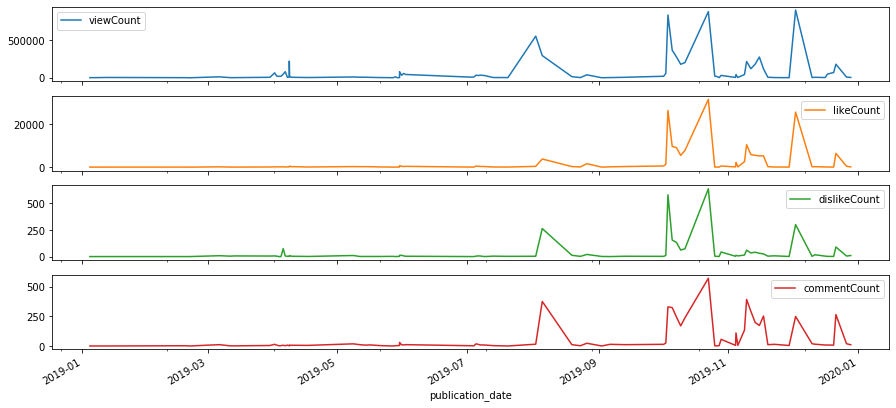

In [106]:
df_2015 = data['2019']
pm_data_2015 = df_2015[['viewCount','likeCount','dislikeCount','commentCount']]
pm_data_2015.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C5F2BC588>,
      dtype=object)

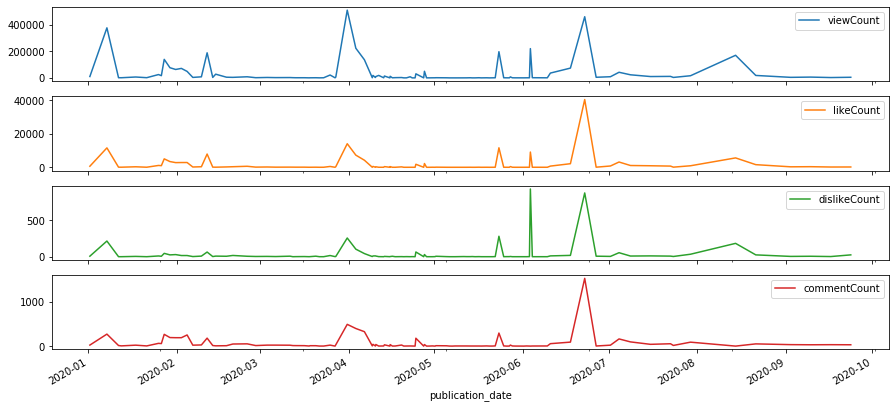

In [107]:
df_2015 = data['2020']
pm_data_2015 = df_2015[['viewCount','likeCount','dislikeCount','commentCount']]
pm_data_2015.plot(subplots=True)

Text(0.5, 0, 'year_month_day_hour')

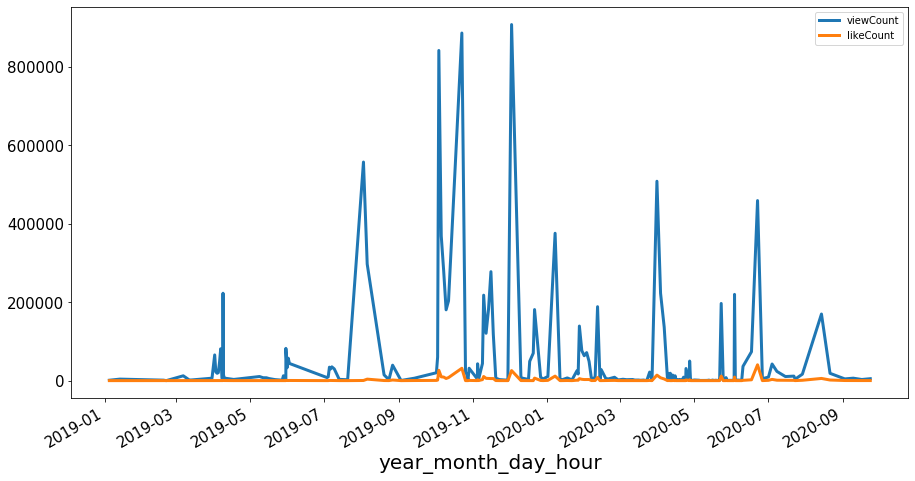

In [109]:
data['2019':'2020'][['viewCount', 'likeCount']].plot(figsize=(15,8), linewidth = 3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize = 20)

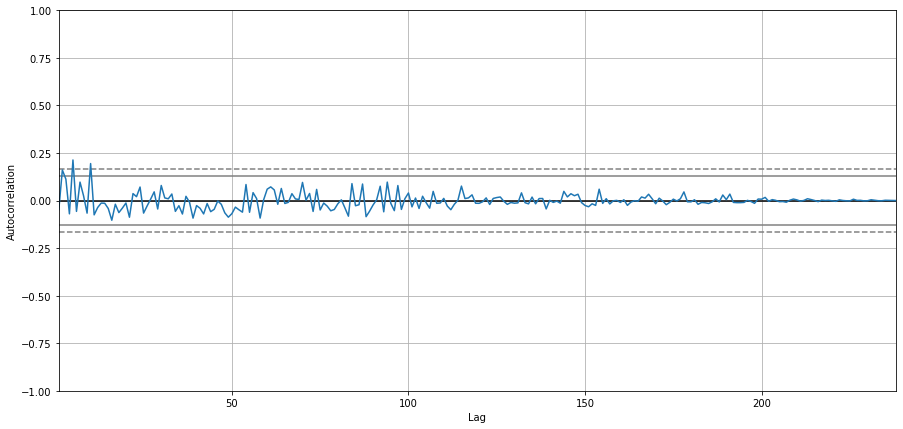

In [110]:
pd.plotting.autocorrelation_plot(data['2016':'2020']['viewCount'])

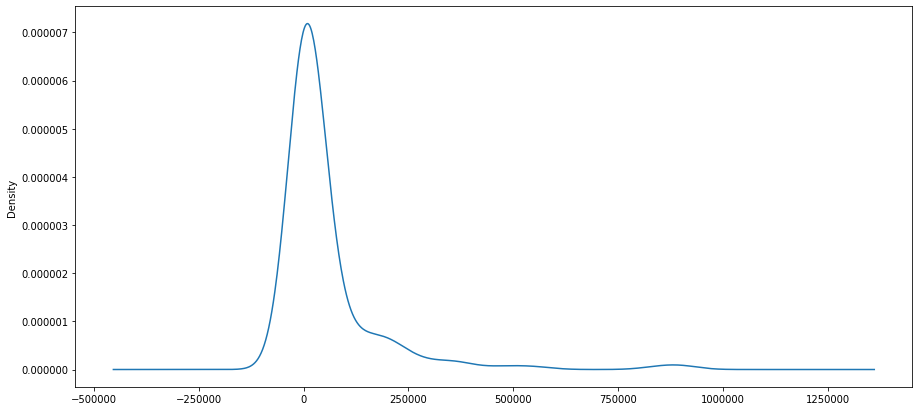

In [93]:
data['viewCount'].plot(kind = 'density')

Text(0.5, 0, 'View Count')

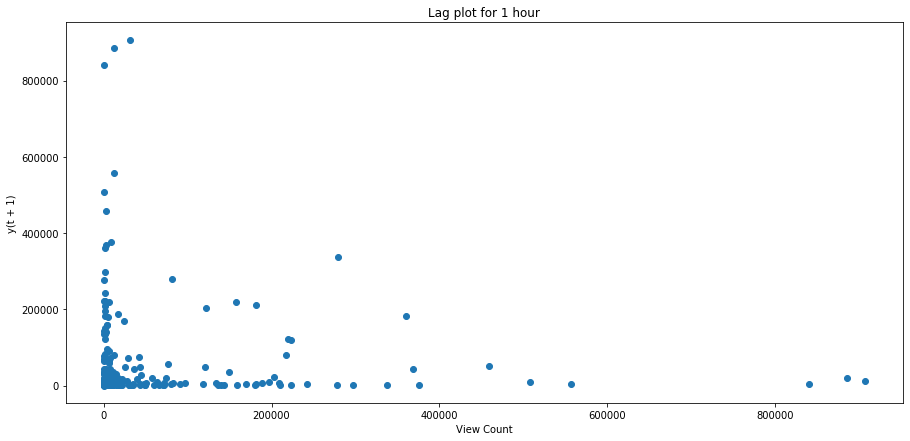

In [96]:
pd.plotting.lag_plot(data['viewCount'], lag=1) # 1 hour
plt.title('Lag plot for 1 hour')
plt.xlabel('View Count')

Text(0.5, 0, 'View Count')

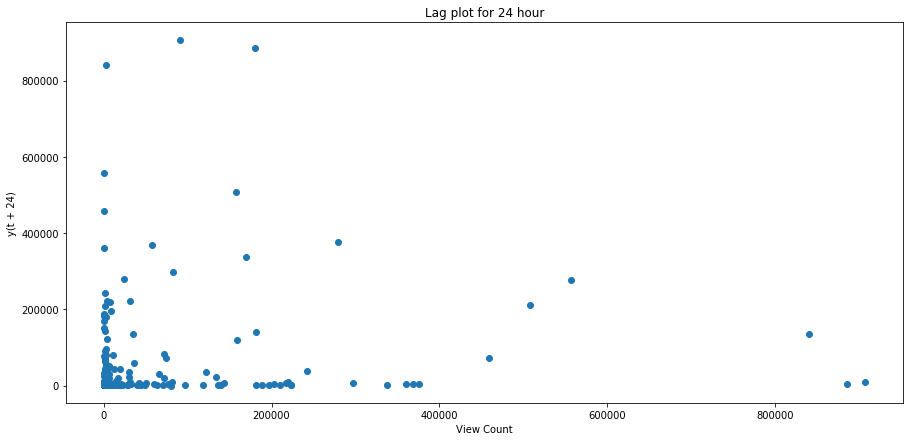

In [98]:
pd.plotting.lag_plot(data['viewCount'], lag=24) # 10 hour
plt.title('Lag plot for 24 hour')
plt.xlabel('View Count')

In [115]:
data.head()

Unnamed: 0           id  \
publication_date                               
2019-04-04 12:39:39           1  -4kHt9nHV5E   
2020-02-06 12:30:00           2  -KhPGgYK__E   
2019-11-04 07:28:10           3  _1DOA2RdwUo   
2018-09-10 12:33:19           4  _aVaR-yQbd8   
2020-01-21 09:41:33           5  _eTSHOtIp5g   

                                                                 title  \
publication_date                                                         
2019-04-04 12:39:39  Singapore | Adrenaline Trail | Naveen Kasturia...   
2020-02-06 12:30:00  A Magical Journey Across Germany | Ft. Cherry ...   
2019-11-04 07:28:10  Revel In The Lap Of Luxury At Beyond By Sula |...   
2018-09-10 12:33:19  #SwipeRightToTravel | Ep 3 | Escaping The City...   
2020-01-21 09:41:33  A Luxurious Getaway In The Heart Of Madhya Pra...   

                                   channel_id channel_title  viewCount  \
publication_date                                                         
2019-04-04 12:39:39  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto      20388   
2020-02-06 12:30:00  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       3891   
2019-11-04 07:28:10  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       4124   
2018-09-10 12:33:19  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto     158988   
2020-01-21 09:41:33  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       1843   

                     likeCount  dislikeCount  favoriteCount  commentCount  \
publication_date                                                            
2019-04-04 12:39:39      141.0           0.0              0           3.0   
2020-02-06 12:30:00      173.0           2.0              0          21.0   
2019-11-04 07:28:10      121.0           3.0              0           5.0   
2018-09-10 12:33:19        9.0           0.0              0           1.0   
2020-01-21 09:41:33       48.0           0.0              0           4.0   

                                                             url  year  month  \
publication_date                                                                
2019-04-04 12:39:39  https://www.youtube.com/watch?v=-4kHt9nHV5E  2019      4   
2020-02-06 12:30:00  https://www.youtube.com/watch?v=-KhPGgYK__E  2020      2   
2019-11-04 07:28:10  https://www.youtube.com/watch?v=_1DOA2RdwUo  2019     11   
2018-09-10 12:33:19  https://www.youtube.com/watch?v=_aVaR-yQbd8  2018      9   
2020-01-21 09:41:33  https://www.youtube.com/watch?v=_eTSHOtIp5g  2020      1   

                         time  day  hour  
publication_date                          
2019-04-04 12:39:39  12:39:39    4    12  
2020-02-06 12:30:00  12:30:00    6    12  
2019-11-04 07:28:10  07:28:10    4     7  
2018-09-10 12:33:19  12:33:19   10    12  
2020-01-21 09:41:33  09:41:33   21     9

In [114]:
data['hour'] = pd.DatetimeIndex(df_non_indexed['publication_date']).hour

In [117]:
data_hourly = data.groupby(["hour"]).sum().reset_index()
data_monthly = data.groupby(["month"]).sum().reset_index()

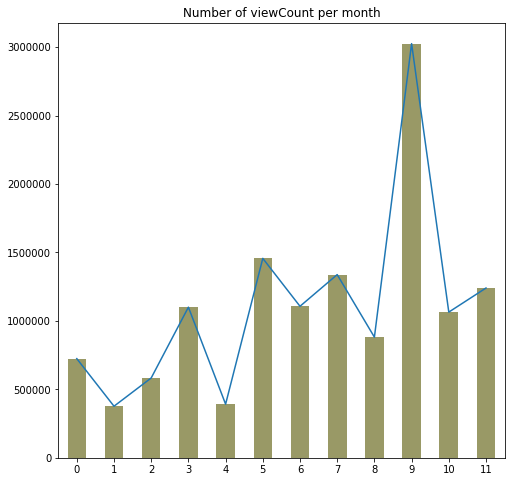

In [119]:
f, ax1 = plt.subplots(1, 1, figsize=(8, 8))

ax1.title.set_text("Number of viewCount per month")
data_monthly["viewCount"].plot.bar(ax=ax1, color='#999966')
data_monthly["viewCount"].plot(ax=ax1)

#ax2.title.set_text("Number of re-tweets per hour")
#data_hourly["retweetCount"].plot.bar(ax=ax2)
#data_hourly["retweetCount"].plot(ax=ax2, color='#999966')

In [120]:
data_yearly = data.groupby(["year"]).sum().reset_index()

Text(0.5, 0, 'Years (2016 to 2020)')

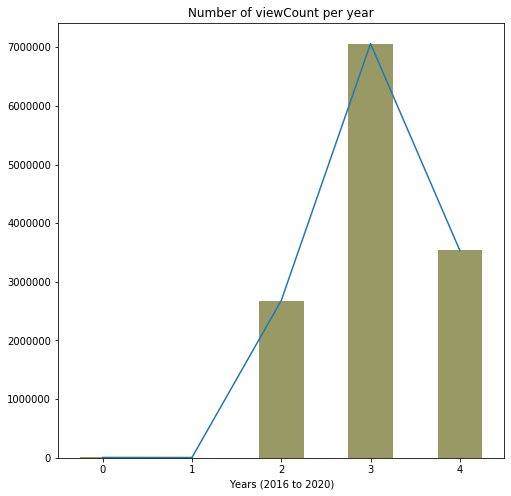

In [127]:
f, ax1 = plt.subplots(1, 1, figsize=(8, 8))

ax1.title.set_text("Number of viewCount per year")
data_yearly["viewCount"].plot.bar(ax=ax1, color='#999966')
data_yearly["viewCount"].plot(ax=ax1)
plt.xlabel('Years (2016 to 2020)')

#### Pair plots

In [310]:
import seaborn as sns

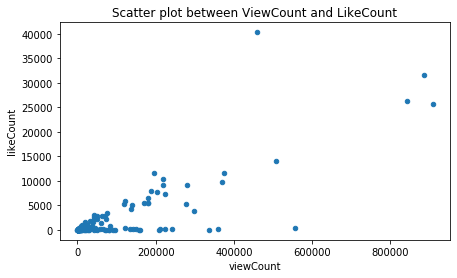

In [321]:
mpl.rcParams['figure.figsize'] = (7, 4)
mpl.rcParams['axes.grid'] = False

data.plot.scatter(x='viewCount', y='likeCount', title= "Scatter plot between ViewCount and LikeCount");

plt.show(block=True);

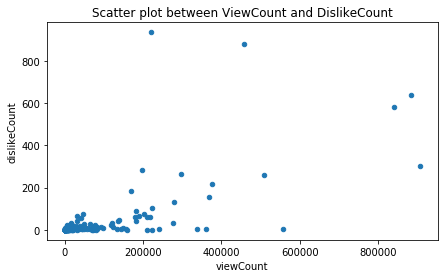

In [322]:
mpl.rcParams['figure.figsize'] = (7, 4)
mpl.rcParams['axes.grid'] = False

data.plot.scatter(x='viewCount', y='dislikeCount', title= "Scatter plot between ViewCount and DislikeCount");

plt.show(block=True);

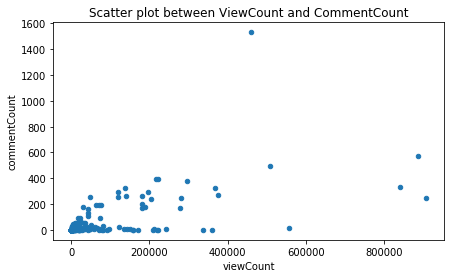

In [326]:
mpl.rcParams['figure.figsize'] = (7, 4)
mpl.rcParams['axes.grid'] = False

data.plot.scatter(x='viewCount', y='commentCount', title= "Scatter plot between ViewCount and CommentCount");

plt.show(block=True);

## Top 10 Liked videos

In [350]:
data.head()

Unnamed: 0           id  \
publication_date                               
2019-04-04 12:39:39           1  -4kHt9nHV5E   
2020-02-06 12:30:00           2  -KhPGgYK__E   
2019-11-04 07:28:10           3  _1DOA2RdwUo   
2018-09-10 12:33:19           4  _aVaR-yQbd8   
2020-01-21 09:41:33           5  _eTSHOtIp5g   

                                                                 title  \
publication_date                                                         
2019-04-04 12:39:39  Singapore | Adrenaline Trail | Naveen Kasturia...   
2020-02-06 12:30:00  A Magical Journey Across Germany | Ft. Cherry ...   
2019-11-04 07:28:10  Revel In The Lap Of Luxury At Beyond By Sula |...   
2018-09-10 12:33:19  #SwipeRightToTravel | Ep 3 | Escaping The City...   
2020-01-21 09:41:33  A Luxurious Getaway In The Heart Of Madhya Pra...   

                                   channel_id channel_title  viewCount  \
publication_date                                                         
2019-04-04 12:39:39  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto      20388   
2020-02-06 12:30:00  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       3891   
2019-11-04 07:28:10  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       4124   
2018-09-10 12:33:19  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto     158988   
2020-01-21 09:41:33  UCjOXlKzzxdZG6BhKCQtWKWQ       Tripoto       1843   

                     likeCount  dislikeCount  favoriteCount  commentCount  \
publication_date                                                            
2019-04-04 12:39:39      141.0           0.0              0           3.0   
2020-02-06 12:30:00      173.0           2.0              0          21.0   
2019-11-04 07:28:10      121.0           3.0              0           5.0   
2018-09-10 12:33:19        9.0           0.0              0           1.0   
2020-01-21 09:41:33       48.0           0.0              0           4.0   

                                                             url  year  month  \
publication_date                                                                
2019-04-04 12:39:39  https://www.youtube.com/watch?v=-4kHt9nHV5E  2019      4   
2020-02-06 12:30:00  https://www.youtube.com/watch?v=-KhPGgYK__E  2020      2   
2019-11-04 07:28:10  https://www.youtube.com/watch?v=_1DOA2RdwUo  2019     11   
2018-09-10 12:33:19  https://www.youtube.com/watch?v=_aVaR-yQbd8  2018      9   
2020-01-21 09:41:33  https://www.youtube.com/watch?v=_eTSHOtIp5g  2020      1   

                         time  day  hour  
publication_date                          
2019-04-04 12:39:39  12:39:39    4    12  
2020-02-06 12:30:00  12:30:00    6    12  
2019-11-04 07:28:10  07:28:10    4     7  
2018-09-10 12:33:19  12:33:19   10    12  
2020-01-21 09:41:33  09:41:33   21     9

In [409]:
data.hour.value_counts()

12    76
13    32
5     30
6     25
7     20
11    17
9     12
10     9
8      9
14     6
18     2
15     2
Name: hour, dtype: int64

In [ ]:
sns.set(font_scale=1.4)
data.likeCount.value_counts()[:10].plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("Name of the Users", labelpad=14)
plt.ylabel("Count of Comments", labelpad=14)
plt.title("Top 10 Active Users", y=1.02)

In [384]:
data.sort_values(by=['dislikeCount'], inplace=True, ascending=False)

In [385]:
data[:10].to_csv('bottom10.csv')

In [383]:
data[['title', 'likeCount']].head(10)

title  \
publication_date                                                         
2020-06-22 13:30:13  36 BEST Places To Visit In India | Most Incred...   
2019-10-22 12:30:12  All You Need To Know Before Planning An EPIC G...   
2019-10-03 12:30:13  World Of MG: Homecoming | S01E01 | 5 KG Mysore...   
2019-12-02 13:30:00  Plan A Trip Of A Lifetime To Bali | All You Ne...   
2020-03-31 12:30:13  World Of MG: Homecoming S1: Roadtrip Across So...   
2020-05-23 13:30:11  15 Cheapest Countries To Visit From India | Bu...   
2020-01-07 11:30:02  Complete Travel Guide For Gokarna, The Cooler ...   
2019-11-09 12:30:12  World Of MG: Homecoming | S02E01 | Ye Kuch Zya...   
2019-10-05 12:30:04  World Of MG: Homecoming | S01E02 | Hello MG, t...   
2019-10-07 12:30:13  World Of MG: Homecoming | S01E03 | Ja Jee Le A...   

                     likeCount  
publication_date                
2020-06-22 13:30:13    40304.0  
2019-10-22 12:30:12    31496.0  
2019-10-03 12:30:13    26368.0  
2019-12-02 13:30:00    25613.0  
2020-03-31 12:30:13    14023.0  
2020-05-23 13:30:11    11607.0  
2020-01-07 11:30:02    11544.0  
2019-11-09 12:30:12    10448.0  
2019-10-05 12:30:04     9677.0  
2019-10-07 12:30:13     9073.0

In [380]:
vid = pd.read_csv('top10.csv')

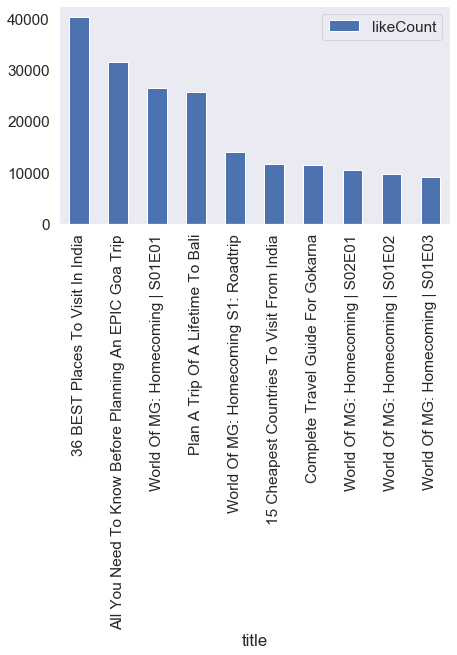

In [381]:
mpl.rcParams['figure.figsize'] = (7, 4)
mpl.rcParams['axes.grid'] = False

vid.plot.bar(x='title', y='likeCount')
#scatter(x='viewCount', y='commentCount', title= "Scatter plot between ViewCount and CommentCount");

plt.show(block=True)

## Comments Analysis

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re

In [398]:
viewed = pd.read_csv('D:/A DSDA/Semester 3/Social Media Analytics/tripoto_most_viewed.csv', engine='python', encoding ="latin-1")

In [399]:
viewed.head(10)

Unnamed: 0      videoId                                        textDisplay  \
0           1  JQr1-VchonU  <a href="https://youtu.be/VtFTBO5QnZo">https:/...   
1           2  JQr1-VchonU                                              Place   
2           3  JQr1-VchonU                                            Raky c.   
3           4  JQr1-VchonU                                            Basa c.   
4           5  JQr1-VchonU                                          Rejmin c.   
5           6  JQr1-VchonU                                  Nice <U+0001F44D>   
6           7  JQr1-VchonU  Thailand Tour Rs.28500 <a href="http://www.you...   
7           8  JQr1-VchonU                     In which country it is located   
8           9  JQr1-VchonU  <a href="https://youtu.be/LsloKdPJZiI">https:/...   
9          10  JQr1-VchonU                     What about vegetarian food..??   

                                        textOriginal  authorDisplayName  \
0                       https://youtu.be/VtFTBO5QnZo     Galaxy J5 2016   
1                                              Place       rahul rathod   
2                                            Raky c.     Sadikur Rahman   
3                                            Basa c.     Sadikur Rahman   
4                                          Rejmin c.     Sadikur Rahman   
5                                  Nice <U+0001F44D>  Daily Travel Book   
6  Thailand Tour Rs.28500 #Andaman Tour Rs.22500 ...     Jolly Holidays   
7                     In which country it is located       karli naveen   
8                       https://youtu.be/LsloKdPJZiI       Monika Singh   
9                     What about vegetarian food..??            Leela M   

                               authorProfileImageUrl  \
0  https://yt3.ggpht.com/a/AATXAJzTNL5jKcmRVaIeL3...   
1  https://yt3.ggpht.com/a/AATXAJy1trZ7O0_PnjRp1m...   
2  https://yt3.ggpht.com/a/AATXAJzE4A_KqyUOc0Z2wb...   
3  https://yt3.ggpht.com/a/AATXAJzE4A_KqyUOc0Z2wb...   
4  https://yt3.ggpht.com/a/AATXAJzE4A_KqyUOc0Z2wb...   
5  https://yt3.ggpht.com/a/AATXAJzKpX9067xuqHQAbb...   
6  https://yt3.ggpht.com/a/AATXAJw3BLFLWA6RVnZO1A...   
7  https://yt3.ggpht.com/a/AATXAJwJqsj0-8t3vUgAq2...   
8  https://yt3.ggpht.com/a/AATXAJyHht2tidwLv7NO5h...   
9  https://yt3.ggpht.com/a/AATXAJw4f6Er6401YiWapX...   

                                    authorChannelUrl  \
0  http://www.youtube.com/channel/UCgNfmiQrXv2aFB...   
1  http://www.youtube.com/channel/UCWtnlEPD9WcvJ5...   
2  http://www.youtube.com/channel/UCrRBh9bkI7z45X...   
3  http://www.youtube.com/channel/UCrRBh9bkI7z45X...   
4  http://www.youtube.com/channel/UCrRBh9bkI7z45X...   
5  http://www.youtube.com/channel/UCNToxshwjMWf5_...   
6  http://www.youtube.com/channel/UCJJuO1MKF3kj9c...   
7  http://www.youtube.com/channel/UC0ldN7mbMYOdRl...   
8  http://www.youtube.com/channel/UC60tbeQFpI8jYi...   
9  http://www.youtube.com/channel/UCUBssQx_pvBuVB...   

      authorChannelId.value  canRate viewerRating  likeCount  \
0  UCgNfmiQrXv2aFBaBVIf3v8w     True         none          0   
1  UCWtnlEPD9WcvJ58MBT1HqbQ     True         none          0   
2  UCrRBh9bkI7z45XimT54Rvag     True         none          0   
3  UCrRBh9bkI7z45XimT54Rvag     True         none          0   
4  UCrRBh9bkI7z45XimT54Rvag     True         none          0   
5  UCNToxshwjMWf5_J3cJ4G5JQ     True         none          0   
6  UCJJuO1MKF3kj9cJQic1BmBw     True         none          0   
7  UC0ldN7mbMYOdRlm9TZkqZOg     True         none          0   
8  UC60tbeQFpI8jYiAWE6h-ezg     True         none          0   
9  UCUBssQx_pvBuVBqbUlZZKlw     True         none          0   

            publishedAt             updatedAt moderationStatus  \
0  2020-09-23T14:00:13Z  2020-09-23T14:00:13Z              NaN   
1  2020-09-23T11:54:34Z  2020-09-23T11:54:34Z              NaN   
2  2020-09-22T16:15:28Z  2020-09-22T16:15:28Z              NaN   
3  2020-09-22T16:15:22Z  2020-09-22T16:15:22Z              NaN   
4  2020-09-22T16

In [400]:
df = viewed

In [401]:
# remove links
df['textOriginal'] = df['textOriginal'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [402]:
# removing punctuations

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [403]:
df['textOriginal'] = df['textOriginal'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df['textOriginal'] = df['textOriginal'].apply(lambda x: remove_punct(x))

In [404]:
# tokenizations

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['textOriginal'] = df['textOriginal'].apply(lambda x: tokenization(x.lower()))

In [405]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
               'treatment', 'associated', 'patients', 'may','day', 'case','old', 'bhai','bro','uf','haan','hi','hey',
                'sir','paaji','paazi','paji','bhi', 'c','httpbitlybalipackagesyt'])

In [406]:
# Stopwords removal

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['textOriginal'] = df['textOriginal'].apply(lambda x: remove_stopwords(x))

In [407]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['textOriginal'] = df['textOriginal'].apply(lambda x: lemmatizer(x))
df.head()

Unnamed: 0      videoId                                        textDisplay  \
0           1  JQr1-VchonU  <a href="https://youtu.be/VtFTBO5QnZo">https:/...   
1           2  JQr1-VchonU                                              Place   
2           3  JQr1-VchonU                                            Raky c.   
3           4  JQr1-VchonU                                            Basa c.   
4           5  JQr1-VchonU                                          Rejmin c.   

  textOriginal authorDisplayName  \
0           []    Galaxy J5 2016   
1      [place]      rahul rathod   
2       [raky]    Sadikur Rahman   
3       [basa]    Sadikur Rahman   
4     [rejmin]    Sadikur Rahman   

                               authorProfileImageUrl  \
0  https://yt3.ggpht.com/a/AATXAJzTNL5jKcmRVaIeL3...   
1  https://yt3.ggpht.com/a/AATXAJy1trZ7O0_PnjRp1m...   
2  https://yt3.ggpht.com/a/AATXAJzE4A_KqyUOc0Z2wb...   
3  https://yt3.ggpht.com/a/AATXAJzE4A_KqyUOc0Z2wb...   
4  https://yt3.ggpht.com/a/AATXAJzE4A_KqyUOc0Z2wb...   

                                    authorChannelUrl  \
0  http://www.youtube.com/channel/UCgNfmiQrXv2aFB...   
1  http://www.youtube.com/channel/UCWtnlEPD9WcvJ5...   
2  http://www.youtube.com/channel/UCrRBh9bkI7z45X...   
3  http://www.youtube.com/channel/UCrRBh9bkI7z45X...   
4  http://www.youtube.com/channel/UCrRBh9bkI7z45X...   

      authorChannelId.value  canRate viewerRating  likeCount  \
0  UCgNfmiQrXv2aFBaBVIf3v8w     True         none          0   
1  UCWtnlEPD9WcvJ58MBT1HqbQ     True         none          0   
2  UCrRBh9bkI7z45XimT54Rvag     True         none          0   
3  UCrRBh9bkI7z45XimT54Rvag     True         none          0   
4  UCrRBh9bkI7z45XimT54Rvag     True         none          0   

            publishedAt             updatedAt moderationStatus  \
0  2020-09-23T14:00:13Z  2020-09-23T14:00:13Z              NaN   
1  2020-09-23T11:54:34Z  2020-09-23T11:54:34Z              NaN   
2  2020-09-22T16:15:28Z  2020-09-22T16:15:28Z              NaN   
3  2020-09-22T16:15:22Z  2020-09-22T16:15:22Z              NaN   
4  2020-09-22T16:15:16Z  2020-09-22T16:15:16Z              NaN   

                           id parentId  
0  UgyTDebzTqllV3roWLd4AaABAg      NaN  
1  Ugwj25YE2NbyAqOLMKt4AaABAg      NaN  
2  Ugw4G4QjYoFdQ7O2vFR4AaABAg      NaN  
3  UgyiXKdzrJ_rnvn1xv54AaABAg      NaN  
4  UgzlGHdQzvwmYMpdEip4AaABAg      NaN

In [408]:
df.to_csv('D:/A DSDA/Semester 3/Social Media Analytics/viewed_cleaned1.csv')

In [283]:
df.head(10)

Unnamed: 0      videoId                                        textDisplay  \
0           1  DtTztc61b5U     Who wants to see Hardeep Paaji In More Vlogs??   
1           2  DtTztc61b5U                 This video is best on your channel   
2           3  DtTztc61b5U  I like it good job bro keep doing like this wo...   
3           4  DtTztc61b5U      This guy is so cool... Swag haan <U+0001F609>   
4           5  DtTztc61b5U                           40-45$ a hour or a day??   
5           6  DtTztc61b5U  hey bud ,,,,,any chance of getting hardeep&#39...   
6           7  DtTztc61b5U                                      Bhai good job   
7           8  DtTztc61b5U                 Hi friends.Azadkhan.haryana.palwal   
8           9  DtTztc61b5U  Can u make more videos of different types of t...   
9          10  DtTztc61b5U  Kya mujhe job Mel shakta Hai Canada me 4 years...   

                                        textOriginal  authorDisplayName  \
0                         [want, see, hardeep, vlog]     Traveling Desi   
1                             [video, best, channel]       Manoj Thakur   
2         [like, good, job, keep, like, wonder, job]      ajay naithani   
3                                  [guy, cool, swag]          Ekta Rana   
4                                           [, hour]         DMC robber   
5  [bud, chanc, get, hardeep, instagram, fb, know...             Guru S   
6                                        [good, job]        ABDUL HAFIZ   
7                       [friendsazadkhanharyanapalw]          Azad Khan   
8              [u, make, video, differ, type, truck]         arzan pitt   
9  [kya, mujh, job, mel, shakta, hai, canada, yea...  canada infromiton   

                               authorProfileImageUrl  \
0  https://yt3.ggpht.com/a/AATXAJwG1-R0X1oxSYZJHr...   
1  https://yt3.ggpht.com/a/AATXAJxHfY6BnUREiYiDb_...   
2  https://yt3.ggpht.com/a/AATXAJx-x3PhlQhz1N-afR...   
3  https://yt3.ggpht.com/a/AATXAJxBHuubpjQomWIltS...   
4  https://yt3.ggpht.com/a/AATXAJzbWmerWFfvNOeVCp...   
5  https://yt3.ggpht.com/a/AATXAJwrA0clf2Nl9_kEQU...   
6  https://yt3.ggpht.com/a/AATXAJwIR8-ze4k6hf3Hdn...   
7  https://yt3.ggpht.com/a/AATXAJweH_FOJOd2kj9q-y...   
8  https://yt3.ggpht.com/a/AATXAJwYYNNL_BDhRaMft0...   
9  https://yt3.ggpht.com/a/AATXAJyEmZlVwl6BytNVaS...   

                                    authorChannelUrl  \
0  http://www.youtube.com/channel/UChoyAdkZQVa4V7...   
1  http://www.youtube.com/channel/UC7EicS0W6ZLPpw...   
2  http://www.youtube.com/channel/UCfw5gRMLUJDkTX...   
3  http://www.youtube.com/channel/UCJqkhE4PycaPeO...   
4  http://www.youtube.com/channel/UCPWGbqwdar-BNW...   
5  http://www.youtube.com/channel/UCsaZa4VrFtKW5H...   
6  http://www.youtube.com/channel/UCkZcySJbYNUU94...   
7  http://www.youtube.com/channel/UC4hpulySDwtGmV...   
8  http://www.youtube.com/channel/UC661C5W6Ck3W6u...   
9  http://www.youtube.com/channel/UCcE7tlSySkEK6_...   

      authorChannelId.value  canRate viewerRating  likeCount  \
0  UChoyAdkZQVa4V7AbZshiLDg     True         none       5321   
1  UC7EicS0W6ZLPpwFeFrvxFzA     True         none          0   
2  UCfw5gRMLUJDkTX2iaLWkTqw     True         none          0   
3  UCJqkhE4PycaPeO2FJTAk3-Q     True         none          0   
4  UCPWGbqwdar-BNW5yfSrp84A     True         none          0   
5  UCsaZa4VrFtKW5H2MkO6VmkQ     True         none          0   
6  UCkZcySJbYNUU94bi1-X2gWQ     True         none          0   
7  UC4hpulySDwtGmV4oP-ocDUA     True         none          1   
8  UC661C5W6Ck3W6upeAwHG0ZA     True         none          0   
9  UCcE7tlSySkEK6_I3e5oxNGQ     True         none          0   

            publishedAt             updatedAt                          id  \
0  2019-09-10T15:09:25Z  2019-09-10T15:09:25Z  UgzbMjWscolEjJBFVwh4AaABAg   
1  2020-09-23T21:40:38Z  2020-09-23T21:40:38Z  UgwU0kw9B5Fq4_E_96F4AaABAg   
2  2020-09-23T21:35:47Z  2020-09-23T21:35:47Z  UgxWpqOmy8UZ72-Y5V14AaABAg   
3  2020-09-23T18:05:57Z  2020-09-23T18

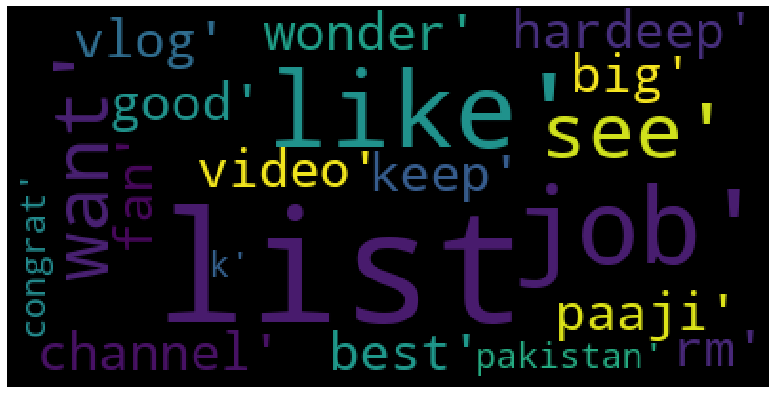

In [202]:
text = df['textOriginal'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [327]:
df.head(3)

Unnamed: 0      videoId                                        textDisplay  \
0           1  giV1ATWIIRY  Guys.. You can add me on Instagram for live in...   
1           2  giV1ATWIIRY  You are so so good...Feel so attached to you a...   
2           3  giV1ATWIIRY                                10th September 2020   

                                        textOriginal       authorDisplayName  \
0  [guy, add, instagram, live, informative, video...          Traveling Desi   
1  [goodfeel, attached, family, parent, eagerly, ...              ARZOO UNVI   
2                                  [th, september, ]  Syed Salman Ali Moosvi   

                               authorProfileImageUrl  \
0  https://yt3.ggpht.com/a/AATXAJwG1-R0X1oxSYZJHr...   
1  https://yt3.ggpht.com/a/AATXAJzO8pqiidLb-jN5aQ...   
2  https://yt3.ggpht.com/a/AATXAJwP4HtGcK3k6RQct3...   

                                    authorChannelUrl  \
0  http://www.youtube.com/channel/UChoyAdkZQVa4V7...   
1  http://www.youtube.com/channel/UC7a4YzIzOwGzR9...   
2  http://www.youtube.com/channel/UCuuwCY705W0C4Z...   

      authorChannelId.value  canRate viewerRating  likeCount  \
0  UChoyAdkZQVa4V7AbZshiLDg     True         none         65   
1  UC7a4YzIzOwGzR9F8dbrQOpA     True         none          0   
2  UCuuwCY705W0C4Z-mQqK0fBA     True         none          0   

            publishedAt             updatedAt moderationStatus  
0  2018-07-19T23:23:57Z  2018-07-19T23:23:57Z              NaN  
1  2020-09-21T19:19:52Z  2020-09-21T19:19:52Z              NaN  
2  2020-09-10T15:59:57Z  2020-09-10T15:59:57Z              NaN

In [330]:
# sorting

df.assign(G=df.groupby('authorDisplayName').authorDisplayName.transform('count')).sort_values(['G','authorDisplayName'],
                                                                                ascending=[False,True]).drop('G',1)

Unnamed: 0      videoId  \
0               1  giV1ATWIIRY   
100           101  giV1ATWIIRY   
200           201  giV1ATWIIRY   
300           301  giV1ATWIIRY   
400           401  9PvxRSRdh0Q   
...           ...          ...   
27154       27155  TKZHCQZ4PJI   
27254       27255  TKZHCQZ4PJI   
50568       50569  KLufdBvYEQA   
50668       50669  KLufdBvYEQA   
50768       50769  KLufdBvYEQA   

                                             textDisplay  \
0      Guys.. You can add me on Instagram for live in...   
100    Guys.. You can add me on Instagram for live in...   
200    Guys.. You can add me on Instagram for live in...   
300    Guys.. You can add me on Instagram for live in...   
400    Guys.. You can add me on Instagram for live in...   
...                                                  ...   
27154            U r perfect traveller a x inspirational   
27254            U r perfect traveller a x inspirational   
50568  My monitiztion is disabled <U+0001F62D><U+0001...   
50668  My monitiztion is disabled <U+0001F62D><U+0001...   
50768  My monitiztion is disabled <U+0001F62D><U+0001...   

                                            textOriginal authorDisplayName  \
0      [guy, add, instagram, live, informative, video...    Traveling Desi   
100    [guy, add, instagram, live, informative, video...    Traveling Desi   
200    [guy, add, instagram, live, informative, video...    Traveling Desi   
300    [guy, add, instagram, live, informative, video...    Traveling Desi   
400    [guy, add, instagram, live, informative, video...    Traveling Desi   
...                                                  ...               ...   
27154       [u, r, perfect, traveller, x, inspirational]               NaN   
27254       [u, r, perfect, traveller, x, inspirational]               NaN   
50568              [monitiztion, disabled, ufdufdufdufd]               NaN   
50668              [monitiztion, disabled, ufdufdufdufd]               NaN   
50768              [monitiztion, disabled, ufdufdufdufd]               NaN   

                                   authorProfileImageUrl  \
0      https://yt3.ggpht.com/a/AATXAJwG1-R0X1oxSYZJHr...   
100    https://yt3.ggpht.com/a/AATXAJwG1-R0X1oxSYZJHr...   
200    https://yt3.ggpht.com/a/AATXAJwG1-R0X1oxSYZJHr...   
300    https://yt3.ggpht.com/a/AATXAJwG1-R0X1oxSYZJHr...   
400    https://yt3.ggpht.com/a/AATXAJwG1-R0X1oxSYZJHr...   
...                                                  ...   
27154  https://yt3.ggpht.com/a/AATXAJxAMdsKblyI2G9tMd...   
27254  https://yt3.ggpht.com/a/AATXAJxAMdsKblyI2G9tMd...   
50568      //s.ytimg.com/yts/img/avatar_32-vflI3ugzv.png   
50668      //s.ytimg.com/yts/img/avatar_32-vflI3ugzv.png   
50768      //s.ytimg.com/yts/img/avatar_32-vflI3ugzv.png   

                                        authorChannelUrl  \
0      http://www.youtube.com/channel/UChoyAdkZQVa4V7...   
100    http://www.youtube.com/channel/UChoyAdkZQVa4V7...   
200    http://www.youtube.com/channel/UChoyAdkZQVa4V7...   
300    http://www.youtube.com/channel/UChoyAdkZQVa4V7...   
400    http://www.youtube.com/channel/UChoyAdkZQVa4V7...   
...                                                  ...   
27154  http://www.youtube.com/channel/UCS-IvEXH-JeEEB...   
27254  http://www.youtube.com/channel/UCS-IvEXH-JeEEB...   
50568                                                NaN   
50668                                                NaN   
50768                                                NaN   

          authorChannelId.value  canRate viewerRating  likeCount  \
0      UChoyAdkZQVa4V7AbZshiLDg     True         none         65   
100    UChoyAdkZQVa4V7AbZshiLDg     True         none         65   
200    UChoyAdkZQVa4V7AbZshiLDg     True         none         65   
300    UChoyAdkZQVa4V7AbZshiLDg     True         none         65   
400    UChoyAdkZQVa4V7AbZshiLDg     True         none        161   
...                         ...      ...          ...        ...   
27154  UCS-IvEXH-JeEEB

In [331]:
df.authorDisplayName.value_counts()

Traveling Desi              794
Shadman abdulkalam Kalam    712
Anupam Asom                 490
shubham madavi              430
Choudhry Sohail             369
                           ... 
SunnyCR7                      1
Sarthak Joshi                 1
Tanmay Anand                  1
Mr. Prince                    1
Kataria Chetan                1
Name: authorDisplayName, Length: 21277, dtype: int64

In [333]:
df_filtered = df[df['authorDisplayName'] != 'Traveling Desi'] 

In [346]:
pd.set_option('display.max_rows', 500)
df_filtered.authorDisplayName.value_counts()[:10] #.index[0:10]

Shadman abdulkalam Kalam    712
Anupam Asom                 490
shubham madavi              430
Choudhry Sohail             369
Nandu Koted                 367
sadia minhas                364
Adeel Hassan                349
Abhishek Singh              309
Ganesh Deshmukh             289
rufi khuje                  288
Name: authorDisplayName, dtype: int64

Text(0.5, 1.02, 'Top 10 Active Users')

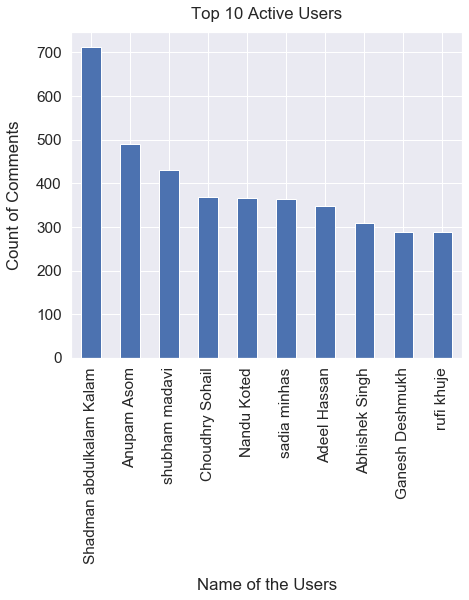

In [348]:
sns.set(font_scale=1.4)
df_filtered.authorDisplayName.value_counts()[:10].plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("Name of the Users", labelpad=14)
plt.ylabel("Count of Comments", labelpad=14)
plt.title("Top 10 Active Users", y=1.02)